In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



In [3]:
df = pd.read_csv('/kaggle/input/wine-datacsv/wine_data.csv')
df.sample(10)

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
118,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372
15,1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310
153,3,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
166,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695
13,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
36,1,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
139,3,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750


In [4]:
df = df[['class_label','alcohol','malic_acid']]
df.sample(10)

,class_label,alcohol,malic_acid
31,1,13.58,1.66
111,2,12.52,2.43
104,2,12.51,1.73
23,1,12.85,1.60
8,1,14.83,1.64
63,2,12.37,1.13
11,1,14.12,1.48
41,1,13.41,3.84
107,2,12.72,1.75
99,2,12.29,3.17


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

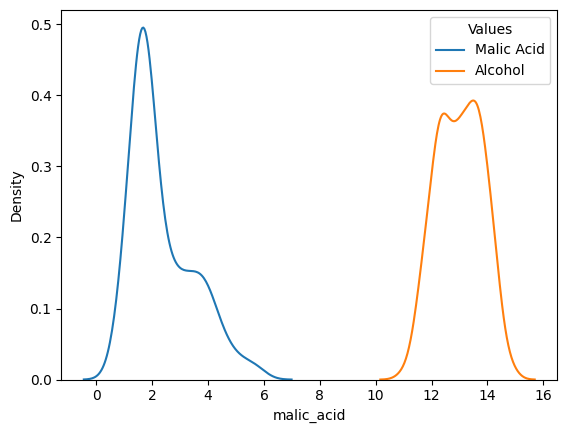

In [5]:
sns.kdeplot(df['malic_acid'] , label = 'Malic Acid')
sns.kdeplot(df['alcohol'] ,label = 'Alcohol')

plt.legend(title='Values')
plt.show

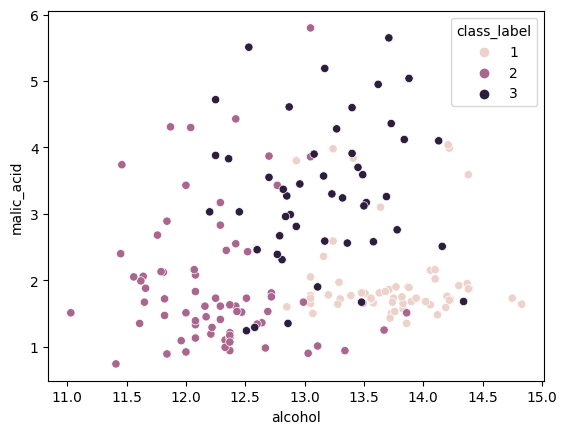

In [6]:
sns.scatterplot(x = df['alcohol'],y= df['malic_acid'], hue = df['class_label'])
plt.show()

### Train Test Split


In [7]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split (df.drop('class_label',axis = 1), df['class_label'], test_size = 0.3 , random_state = 3)

x_train.shape , x_test.shape

((124, 2), (54, 2))

### MinMaxScaling


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)


MinMaxScaler()

In [9]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [10]:
np.round(x_train_scaled.describe(),2)

,alcohol,malic_acid
count,124.00,124.00
mean,0.47,0.34
std,0.24,0.24
min,0.00,0.00
25%,0.28,0.17
50%,0.47,0.23
75%,0.67,0.52
max,1.00,1.00


In [11]:
np.round(x_test_scaled.describe(),2)

,alcohol,malic_acid
count,54.00,54.00
mean,0.50,0.26
std,0.25,0.16
min,-0.11,0.03
25%,0.29,0.16
50%,0.51,0.21
75%,0.69,0.35
max,1.02,0.79


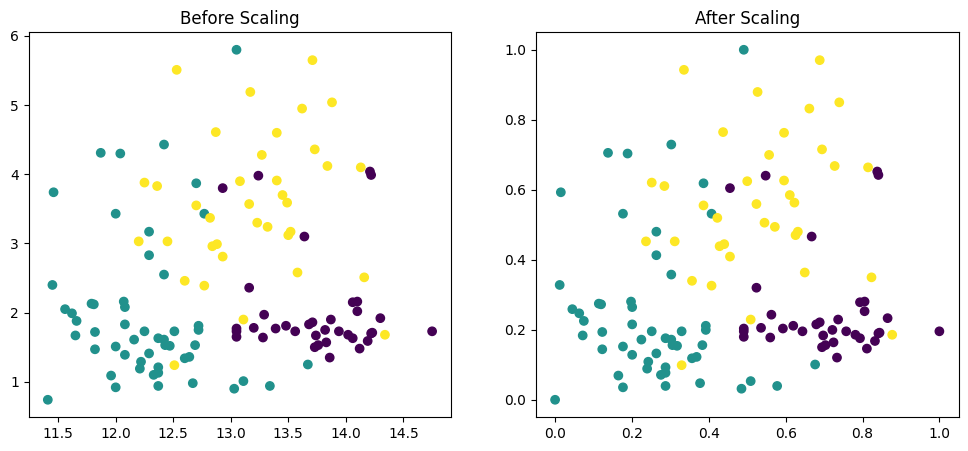

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['alcohol'], x_train['malic_acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['alcohol'], x_train_scaled['malic_acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

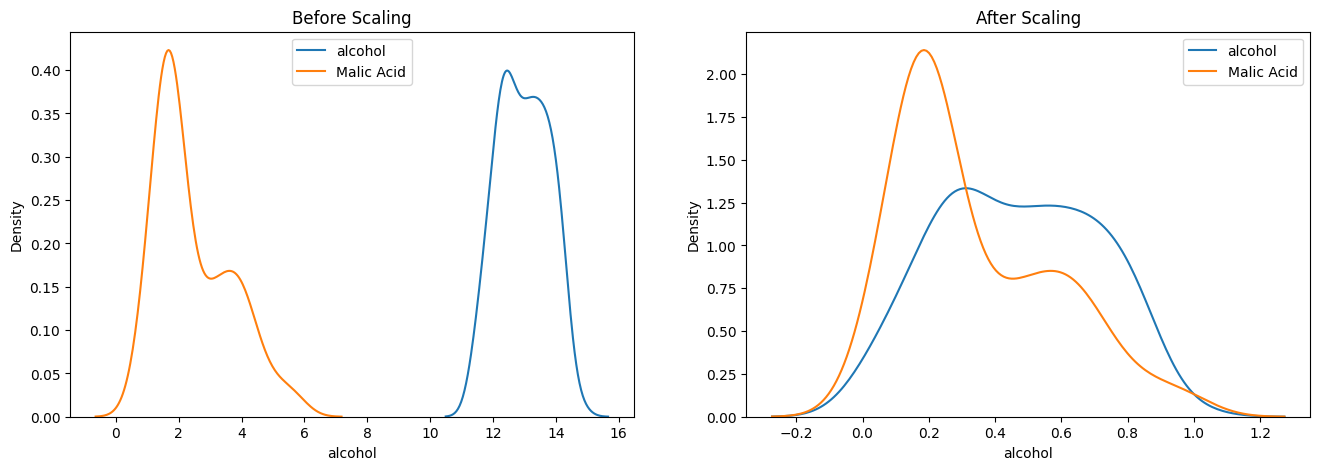

In [23]:
fig , (ax1,ax2) = plt.subplots(ncols =2 , figsize=(16,5))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['alcohol'],ax =ax1,label='alcohol')
sns.kdeplot(x_train['malic_acid'],ax =ax1,label ='Malic Acid')
ax1.legend()
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['alcohol'],ax=ax2,label='alcohol')
sns.kdeplot(x_train_scaled['malic_acid'],ax=ax2,label ='Malic Acid')
ax2.legend()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

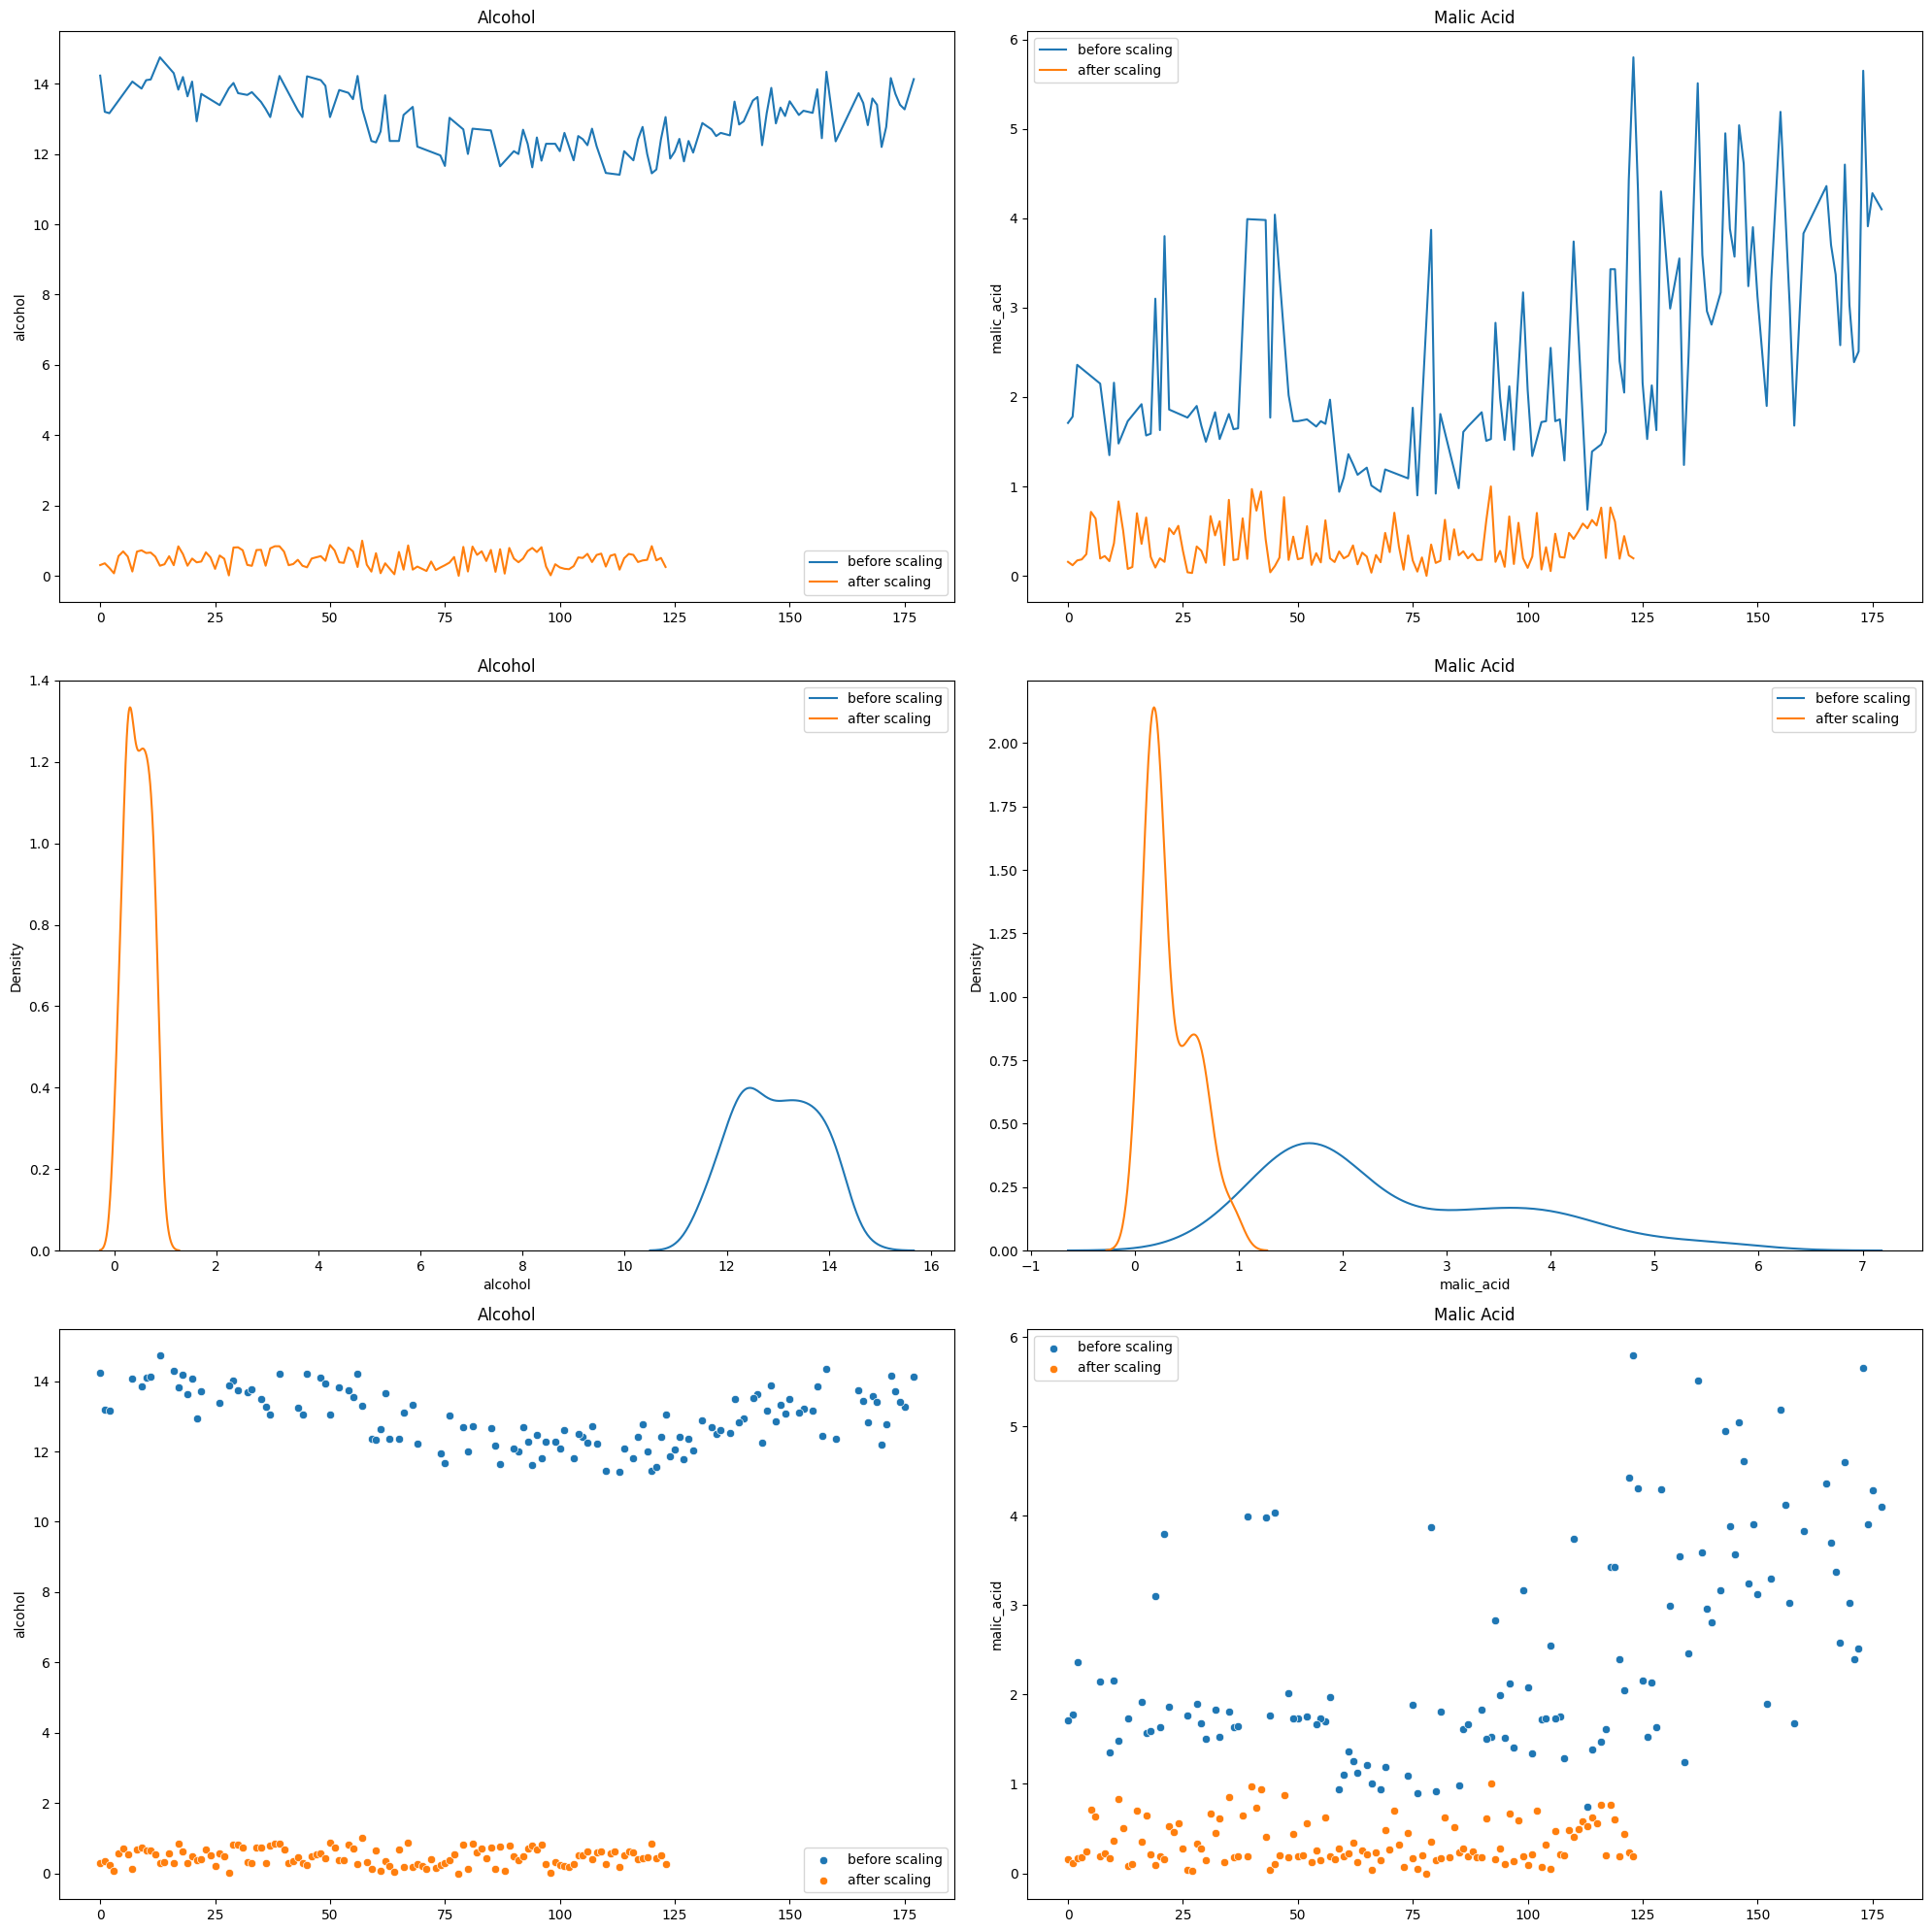

In [34]:
fig , ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

ax1.set_title('Alcohol')
sns.lineplot(data=x_train['alcohol'], ax=ax1, label='before scaling')
sns.lineplot(data=x_train_scaled['alcohol'], ax=ax1, label='after scaling')
ax1.legend()

ax2.set_title('Malic Acid')
sns.lineplot(data=x_train['malic_acid'], ax=ax2, label='before scaling')
sns.lineplot(data=x_train_scaled['malic_acid'], ax=ax2, label='after scaling')
ax2.legend()

ax3.set_title('Alcohol')
sns.kdeplot(x_train['alcohol'], ax=ax3, label='before scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax3, label='after scaling')
ax3.legend()

ax4.set_title('Malic Acid')
sns.kdeplot(x_train['malic_acid'], ax=ax4, label='before scaling')
sns.kdeplot(x_train_scaled['malic_acid'], ax=ax4, label='after scaling')
ax4.legend()

ax5.set_title('Alcohol')
sns.scatterplot(data=x_train['alcohol'], ax=ax5, label='before scaling')
sns.scatterplot(data=x_train_scaled['alcohol'], ax=ax5, label='after scaling')
ax5.legend()

ax6.set_title('Malic Acid')
sns.scatterplot(data=x_train['malic_acid'], ax=ax6, label='before scaling')
sns.scatterplot(data=x_train_scaled['malic_acid'], ax=ax6, label='after scaling')
ax6.legend()

plt.tight_layout()
plt.show()